In [1]:
results_folder = 'final_results_old'
from scripts.presentation2 import parse_results_from_folder, form_matrix, plot_matrix, form_matrices, matrix_merger, get_base_score_matrix
df = parse_results_from_folder(results_folder)
df.head(4)

,BLEU,chrF,BERT-F1,COMET,dataset,translator,src_lang,tgt_lang
0,34.060691,62.410104,87.193665,87.752561,ep,deepl,da,de
1,28.739547,55.275677,85.196410,89.326129,ep,deepl,da,el
2,40.892690,63.898571,89.161670,86.687622,ep,deepl,da,en
3,37.117352,61.804831,87.723620,86.294007,ep,deepl,da,es


# RQ1

INTO: 7.4, 4.2


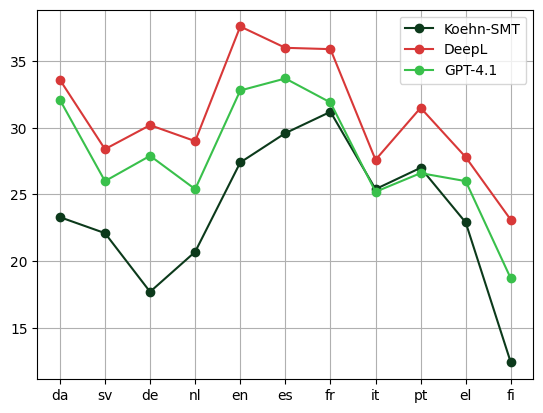

FROM: 7.3, 4.2


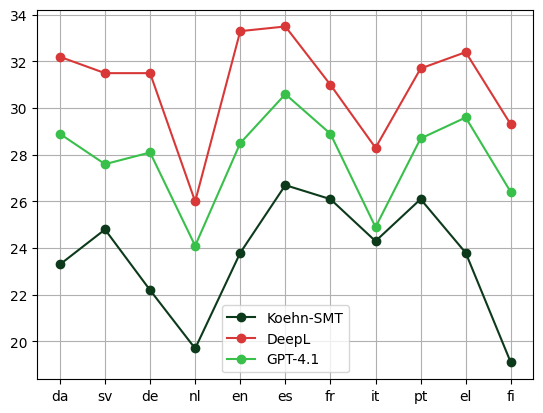

DIFF: -0.0, -0.0


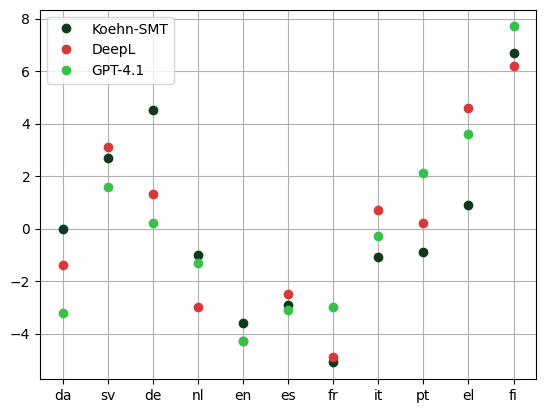

In [14]:
from scripts.presentation2 import parse_results_from_folder, form_matrix, plot_matrix, form_matrices, matrix_merger, get_base_score_matrix
from scripts.presentation2 import aggregate_matrices, extract_vectors, plot_vectors
results_folder = 'final_results_old'
df = parse_results_from_folder(results_folder)

labels = {'ep-deepl': 'DeepL', 'ep-gpt': 'GPT-4.1', 'base':'Koehn-SMT'}
colors = {'ep-deepl': '#D83838', 'ep-gpt': '#39C04B', 'base':'#0C3A1B'}
matrices = form_matrices(df, 'BLEU', ['deepl', 'gpt'], ['ep', 'ep'])

for m in ['INTO', 'FROM', 'DIFF']:
    aggr = aggregate_matrices(matrices, mode=m, include_base=True)
    linestyle=None
    if m=='DIFF':
        linestyle='None'
    deepl_mean_diff = aggr['ep-deepl'].mean()
    gpt_mean_diff = aggr['ep-gpt'].mean()
    print(f'{m}: {deepl_mean_diff:.1f}, {gpt_mean_diff:.1f}')
    plot_vectors(aggr, include_base=True, label_map=labels, color_map=colors, linestyle=linestyle)
    


In [11]:
diffs = aggregate_matrices(matrices, mode='DIFF', include_base=True)
for k in diffs:
    mean = diffs[k].mean()
    std = diffs[k].std()
    outliers = diffs[abs(diffs[k] - mean) > std]
    high_outliers = outliers[outliers[k] > mean].index.tolist()
    low_outliers = outliers[outliers[k] < mean].index.tolist()
    print(f'{k}: {mean:.1f} ({std:.1f})')
    print(f'High Outliers: {high_outliers}')
    print(f'Low Outliers: {low_outliers}')
    print()

ep-deepl: -0.0 (1.9)
High Outliers: ['el']
Low Outliers: ['de', 'nl']

ep-gpt: -0.0 (2.3)
High Outliers: ['pt', 'el']
Low Outliers: ['da', 'de']

base: 0.0 (3.5)
High Outliers: ['de', 'fi']
Low Outliers: ['en', 'fr']

